# Opiod Prescription Part D Analysis 2013 & 2014

# Data 602
### Christopher Estevez

# Overview
### This project is intended to inform and show my python data manipulation skills. The project consists of data from Centers for Medicare and Medicaid Services(CMS)Opioid Prescription Data for years 2013 and 2014. Many articles in the news reference the Opioid epidemic and this dataset does not tell the whole story, but highlights where the increase is coming from. This project highlights how I intend to use Python.

# Data
### The data was obtained from CMS online web portal and certain columns had to be removed to make the project reproducible and store the data in GitHub which has a limit of 25MBs per file. After merging the files, the total rows are 987,425 and 7 columns.

### Data sources
#### 2013
https://data.cms.gov/Medicare-Claims/Medicare-Part-D-Opioid-Prescriber-Summary-File-201/yb2j-f3fp

#### 2014
https://data.cms.gov/Medicare-Claims/Medicare-Part-D-Opioid-Prescriber-Summary-File-201/e4ka-3ncx


## Environment
### I only used Pandas, Matplotlib and seaborn. I believe the 3 packages allowed me to manipulate data in a manner that is easy and consistent. The Seaborn package is used to add a color pallet to charts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.mpl_style = 'default'
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


C:\Python27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Python27\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


### In the below code, I read the Opioid claim data for 2013 and 2014 stored in GitHub. I add the year to each data set and merge to complete the data frame.

In [2]:
url_1 = 'https://raw.githubusercontent.com/chrisestevez/DataAnalytics/master/Data/MedicareOpioidPrescriber2014Reduced.csv'
url_2 = 'https://raw.githubusercontent.com/chrisestevez/DataAnalytics/master/Data/MedicareOpioidPrescriber2013Reduced.csv'
data1 = pd.read_csv(url_1, names = ['ZIP', 'State', 'Prov_Specialty','Total_Claims','Opioid_Claims','Pres_Rate'], skiprows=1,converters={'ZIP': lambda x: str(x)})
data1['Year'] ='2014'
data2 = pd.read_csv(url_2,names = ['ZIP', 'State', 'Prov_Specialty','Total_Claims','Opioid_Claims','Pres_Rate']  ,skiprows=1,converters={'ZIP': lambda x: str(x)})
data2['Year'] = '2013'
Data = data1.append(data2, ignore_index=True)
Data['Opioid_Claims'] = pd.to_numeric(Data['Opioid_Claims'])

### Below is the head and tail of the data frame.

In [3]:
Data

,ZIP,State,Prov_Specialty,Total_Claims,Opioid_Claims,Pres_Rate,Year
0,48183,MI,Emergency Medicine,124,33,0.2661,2014
1,96819,HI,Urology,936,32,0.0342,2014
2,49546,MI,Ophthalmology,590,11,0.0186,2014
3,95376,CA,Dentist,46,11,0.2391,2014
4,62220,IL,General Surgery,85,45,0.5294,2014
5,95116,CA,Physical Medicine and Rehabilitation,472,46,0.0975,2014
6,55431,MN,Orthopedic Surgery,142,116,0.8169,2014
7,94599,CA,Family Practice,2321,104,0.0448,2014
8,62901,IL,Emergency Medicine,199,61,0.3065,2014
9,53098,WI,Obstetrics/Gynecology,152,12,0.0789,2014


### Using the build in pandas describe function allows us to have a statistical summary of the data frame. The variable of interest is the Opiod_Claims which we breakdown further in the next input.

In [4]:
Data.describe()

,Total_Claims,Opioid_Claims,Pres_Rate
count,987455.000000,987455.000000,987455.000000
mean,2318.816544,159.525533,0.183278
std,4225.469253,363.751760,0.192039
min,11.000000,11.000000,0.000400
25%,163.000000,23.000000,0.041200
50%,554.000000,52.000000,0.094000
75%,2672.000000,146.000000,0.280900
max,226081.000000,26449.000000,1.000000


### Describing the data by year highlights the similarities in the data and how most of the data around the third quartile (75%) is 145 to 146 opioid claims.

In [5]:
Data['Opioid_Claims'].groupby(Data['Year']).describe()

Year       
2013  count    490201.000000
      mean        159.045373
      std         356.903378
      min          11.000000
      25%          23.000000
      50%          52.000000
      75%         146.000000
      max       21551.000000
2014  count    497254.000000
      mean        159.998882
      std         370.378828
      min          11.000000
      25%          23.000000
      50%          52.000000
      75%         145.000000
      max       26449.000000
Name: Opioid_Claims, dtype: float64

### The Histogram for the 2013 and 2014 highlight the similarities in the data distribution and the right skew for both datasets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000023A4F978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002BC03240>], dtype=object)

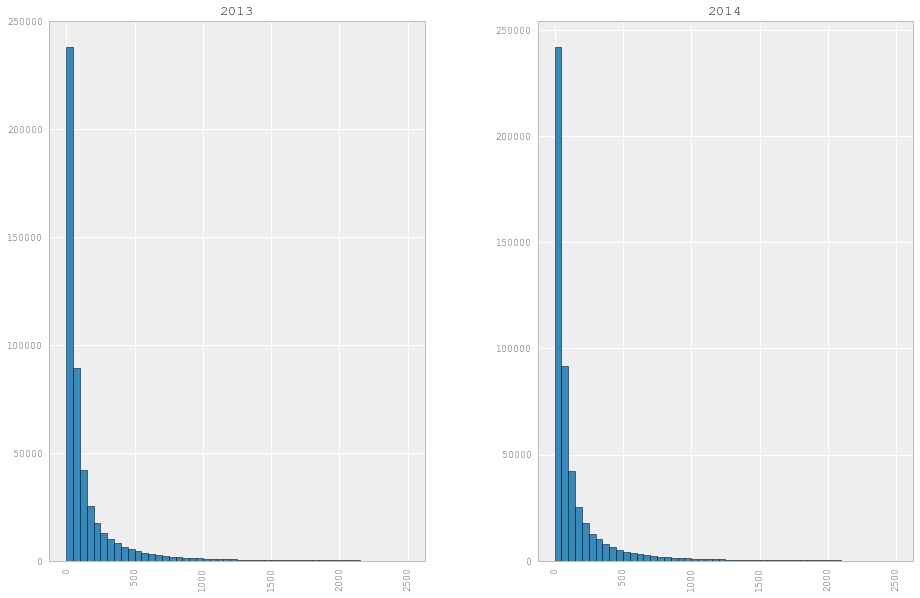

In [6]:
Data.hist(column= 'Opioid_Claims',by = Data['Year'],bins=50,edgecolor='black',range= (0,2500))

### A Boxplot of opioid claims identify the previous distribution of the data.

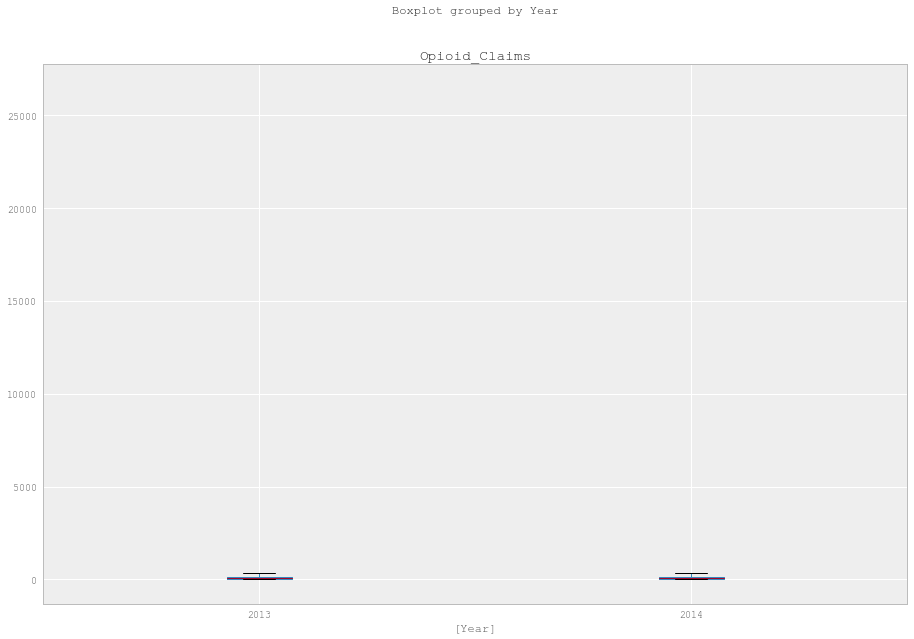

In [7]:
Data.boxplot(column= ['Opioid_Claims'], by = ['Year'])

In [8]:
FYear = Data[Data['Year']=='2013']
LYear = Data[Data['Year']=='2014']
Opiod_C2013 = FYear.groupby('State')['Opioid_Claims'].sum().sort_values(ascending=False)
Opiod_C2014 = LYear.groupby('State')['Opioid_Claims'].sum().sort_values(ascending=False)

### The below plot shows the distribution for opioid prescriptions for the year 2013. The chart identified California as the top opioid prescriber.

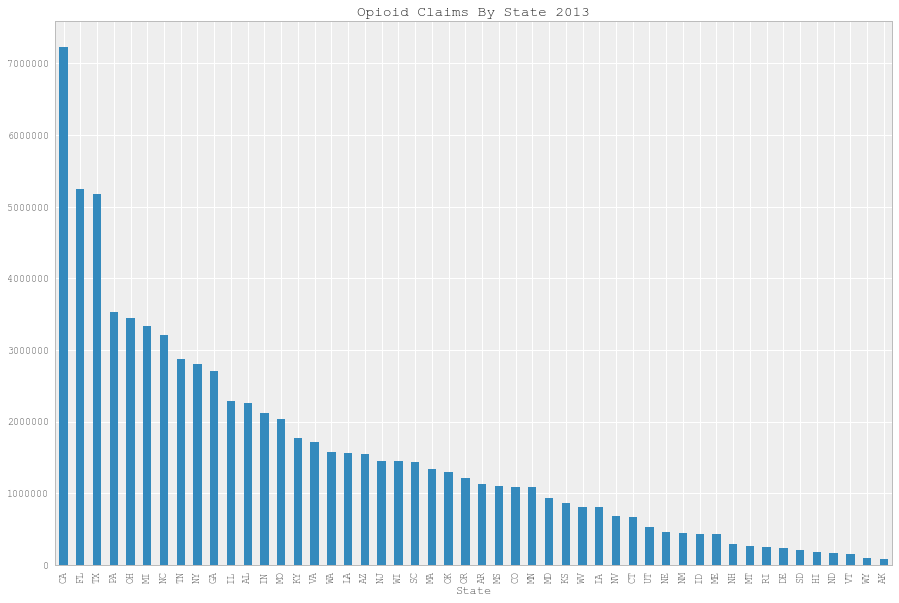

In [9]:
Opiod_C2013.plot(kind="bar",title = "Opioid Claims By State 2013")

### The below plot shows the distribution for opioid prescriptions for the year 2014. The chart again identified California as the top opioid prescriber.

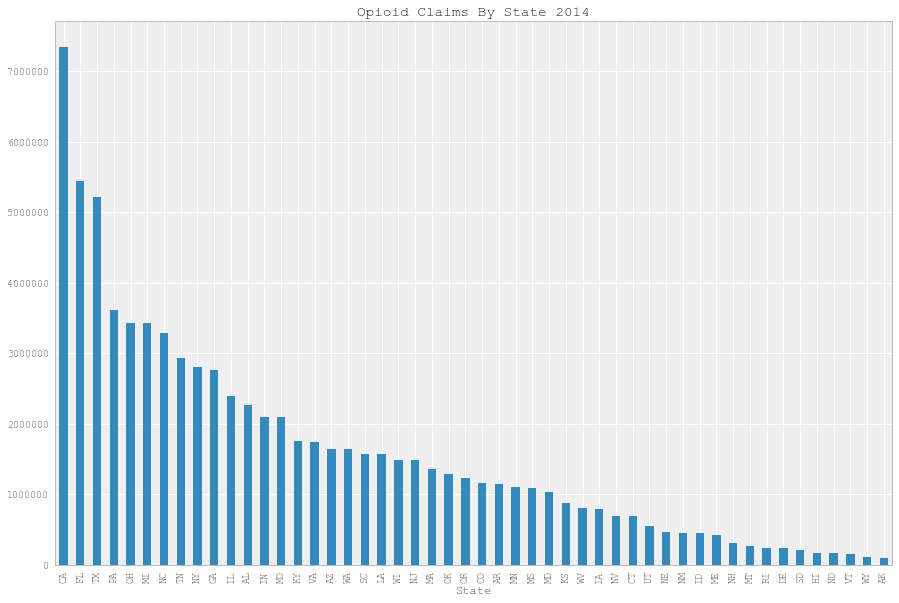

In [10]:
Opiod_C2014.plot(kind="bar",title = "Opioid Claims By State 2014")

In [11]:
YealyComp = Data.groupby('Year')['Opioid_Claims'].sum().sort_values(ascending=False)

### Total Opioid claims for 2014 79,560,084 and 2013 77,964,201. The year 2014 represented a total increase of 2% from the previous year.

Year
2014    79560084
2013    77964201
Name: Opioid_Claims, dtype: int64

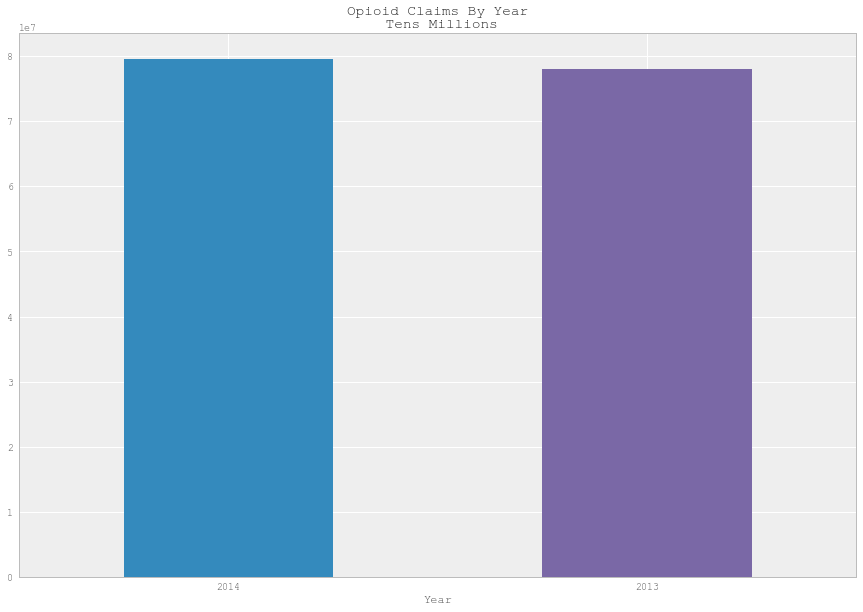

In [12]:
YealyComp.plot(kind="bar",color=sns.color_palette(),title = "Opioid Claims By Year\n Tens Millions",rot = 0)
YealyComp

In [13]:
Data.groupby('Year')['Opioid_Claims'].sum().sort_values(ascending=True).pct_change()


Year
2013         NaN
2014    0.020469
Name: Opioid_Claims, dtype: float64

In [14]:
ChangeState = Data[['State','Year','Opioid_Claims']]
CHG_BY_STATE = ChangeState['Opioid_Claims'].groupby([ChangeState['State'], ChangeState['Year']]).sum().unstack()
CHG_BY_STATE['Prev_Y_CHG'] = ((CHG_BY_STATE['2014'] - CHG_BY_STATE['2013'])/CHG_BY_STATE['2013'])
CHG_BY_STATEF = CHG_BY_STATE['Prev_Y_CHG']

### Let’s identify what states had the biggest opioid increases from 2013. Maryland had the biggest increases by 10 %.  Rhode Island had the biggest decrease by 4%.

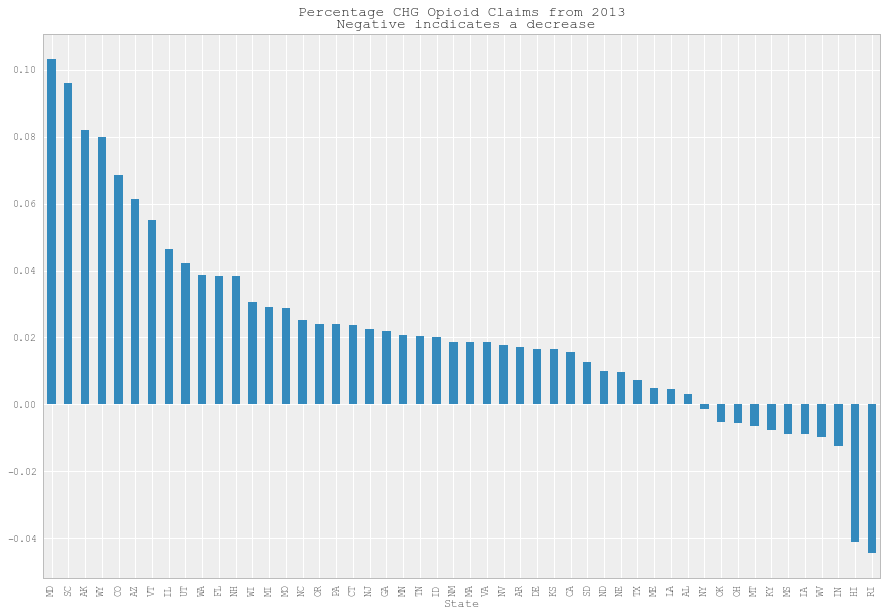

In [15]:
CHG_BY_STATEF.sort_values(ascending=False).plot(kind="bar",title = "Percentage CHG Opioid Claims from 2013\n Negative incdicates a decrease")

### Slicing the data by specialty identify institutions account for the top increases in opioid prescriptions.

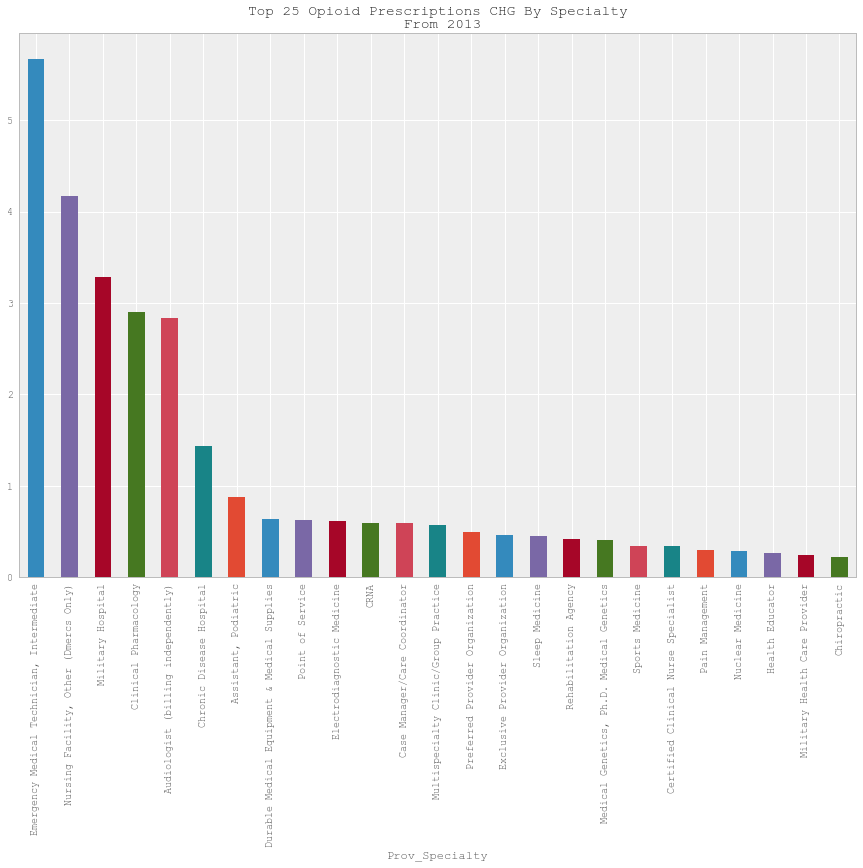

In [16]:
SpecData = Data[['Prov_Specialty','Year','Opioid_Claims']]
CHG_Spec = SpecData['Opioid_Claims'].groupby([SpecData['Prov_Specialty'], SpecData['Year']]).sum().unstack()
CHG_Spec['Prev_Y_CHG_ZIP'] = ((CHG_Spec['2014'] - CHG_Spec['2013'])/CHG_Spec['2013'])
CHG_SpecF = CHG_Spec['Prev_Y_CHG_ZIP']
CHG_SpecF.sort_values(ascending=False).nlargest(25).plot(kind="bar",color=sns.color_palette(),title = "Top 25 Opioid Prescriptions CHG By Specialty\n From 2013")

### Below I Identify 25 specialties with the highest decrease of opioid claims from 2013. Occupational therapist had the highest decrease by 9%.

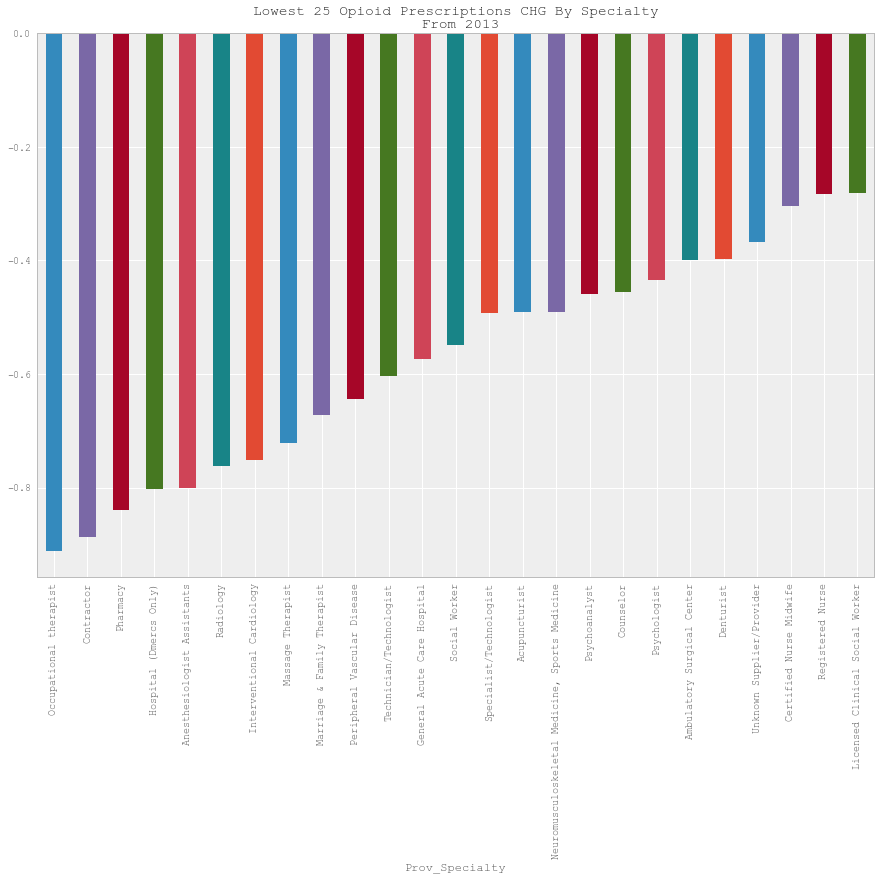

In [17]:
CHG_SpecF.sort_values(ascending=False).nsmallest(25).plot(kind="bar",color=sns.color_palette(),title = "Lowest 25 Opioid Prescriptions CHG By Specialty\n From 2013")

# Conclusion

###  It was interesting to find that institutions account for mayor increases and decreases. For example, the previous chart identified Ambulatory Surgical Center and acute hospitals as having a decrease in prescriptions. Considering last year there was an increase of 2%, we cannot consider the opioid epidemic over. The 2% accounts for 1,595,883 additional prescriptions for the year 2014, and from those prescriptions many have the potential to become addicted. I wanted to display a map perspective of this dataset but was unable due to my python version incompatibility to mapplot. 

# References
### stackoverflow.com
### pandas.pydata.org